# Diagnosis of COVID-19

### Projet - mise en application du cours Machine Learnia

# 0. Définition de l'objectif

- Prédire si une personne est infectée ou non en fonction des données disponibles.
- Atteindre un score F1 de 50% et un recall de 70%

---


# 1. Exploratory Data Analysis

## Objectif :

**<font color=blue>. Comprenhension de nos données**
</font>

**<font color=blue>. Développer une première stratégie de modélisation**
</font>

## Checklist de base : 


### **Analyse de forme** :

   * Variable target :** SARS-Cov-2 exam result

   * Lignes et colonnes : 5644 lignes, 111 colonnes

   * Types de variables : 70 quantitatives, 41 qualitatives

   * Analyse des valeurs manquantes : Le heatmap ainsi que le taux de présence révèle :

        - beaucoup de données manquantes (la moitié des variables > 90%)
        - certaines variables très peu renseignées -> on pourra les supprimer
        - 2 groupes de variables apparaissent (renseignées en même temps et de la même façon 76% et 90%) (-> Elles ont sans doute un rapport entre elles)
        - **Conclusion de l'analyse des valeurs manquantes :**
        * On va éliminer les variables ayant plus de 90% de données manquantes.
        * Il nous restera deux groupes de données, celles avec 89% et 76% de données manquantes.
        * Deux groupes de variables : 

            - 76% -> tests viraux (on les nommera variables 'viral') , 
            - 89% -> tests de composition sanguine (variables 'blood')

    

### **Analyse de fond :**

* **Travail préalable : nettoyage des données :**

        On supprime les colonnes renseignées à moins de 90% -> il reste 39 cols
 
* **Visualisation de la target :**

        10% de positifs

* **Signification des variables :** 
<br/>

    * **Histogramme pour les variables continues**
<br />

        * **Observations pour les float64**
<br />

            * Les données sont toutes centrées sur 0, ce qui laisse supposer qu'elles ont été standardisées.

            * Beaucoup ont une distribution normale mais pas toutes
<br />

        * **Observations pour les int64 (ordinales en fait ? se rapprochent de variables qualitatives)**        
<br />
     
            * age quantile : difficile d'interpréter ce graphique.
            
                La distribution de l'âge révèle une distribution des valeurs de 0 à 20. On n'a pas d'information
                sur le découpage qui a été effectué. Hypothèse : tranches de 5 ans.
                Mais ça peut aussi être une transformation (avec quantiletransformer par exemple).
<br />

            * autres (variables parcours de soins) : 
                Deux valeurs. Pas d'information particulière. On fera une analyse plus  poussée plus tard.
<br />

    * **Histogramme des variables qualitatives (catégorielles)**
<br />

        1. Première chose à faire : Vérifier les différentes catégories qui résident dans chaque variable
    
            Par exemple : target : positif/négatif
            value_counts ok mais mieux : np.unique, aussi dispo dans pandas.

            Observation : toutes deux valeurs, une ne contient qu'une seule valeur et pourra sûrement être supprimée.
<br />    

        2. Ensuite : compter le nombre de valeurs dans chaque catégorie.
    
            Observations : les variables qualitatives sont toutes binaires, viral, et Rhinovirus/Enterovirus élevée.
<br />    
    

* **Relation variable/Target :**
<br />    

    Observations :
<br />    
    
    - Monocytes, Leucocytes, Placelets ont un centre de distribution différent selon la population positive/négative.
    
    - Les taux de ces variables semblent liées au covid-19 => Tester cette hypothèse.
    
    - Pour les variables suivantes, la moyenne est la même mais on note des différences :
           - Hematocrit : la dispersion est différente autour de la moyenne
           - Hemoglobin : positifs -> valeurs plus élevées
           - Red blood cells : négatives : valeurs autour de la moyenne plus nombreuses.
           - Basophils : positives : valeurs autour de la moyenne plus nombreuses.
           - MCH : idem
           - Eosinophils : idem
           - MCV : idem
           - RDW : l’inverse
           - Relation Target / Age :

    - les individus de faible âge sont très peu contaminés ? -> attention, on ne connait pas l'âge, et on ne sait pas de quand date le dataset (s'il s'agit des enfants, on sait maintenant que les enfants sont touchés autant que les adultes). 

    - En revanche cette variable pourra être utile et intéressante pour la comparer avec les résultats de tests sanguins.
    
    - Relation Target / Variables qualitatives (variables catégorie 'viral')   -> utilisation de crosstab
         
    - les doubles maladies sont rares. 
    
    - Rhinovirus/Enterovirus positif x covid-19 négatif ? -> Hypothèse à tester (mais pas à ce stade)
    (mais il est possible que la région ait subie une épidémie de ce virus. De plus, on peut très bien avoir 2 virus en même temps. Mais il se peut très bien que ça n'ait aucun lien avec le covid-19.

    - on peut supprimer la variable Parainfluenza 2 comme on l'a vu précédemment.
             
             
             
### Premières conclusions 

* Beaucoup de données manquantes (au mieux on garde 20% du dataset)

* 2 groupes de données intéressantes (viral, sanguin)

* Presque pas de variables 'discriminantes' pour distinguer les cas positifs/négatifs, ce qui nous permet de dire qu'il n'est pas vraiment approprié de vouloir prédire si un individu est atteint du Covid-19 en se basant sur ces simples tests sanguins.

* Mais ce n'est pas grave, il faut quand même poursuivre l'analyse pour essayer de voir ce qu'on peut apprendre. On va jusqu'au bout !

* Et éventuellement on montrera que l'on ne peut pas aller plus loin, où ce qui ne va pas, s'il manque des données, si le modèle sera en over ou under fitting...

* Point positif : on a pu identifier des variables intéressantes qui sont susceptibles de jouer un rôle non négligeable (monocytes, leucocytes, placelets).


---

# Analyse plus détaillée

* **Relation Variables / Variables**

    * blood_data / blood_data 
        
        - certaines variables sont très corrélées entre elles (coef de corr à +0.9) - A surveiller plus tard.
    
    * blood_data / age : on observe une très faible corrélation entre age et données blood (taux sanguins).
    
    * viral / viral : rapid test (A et B) donnent de mauvais résultats (fait connu corroboré ici), il faudra peut-être
    laisser tomber ces deux variables.
    Etude de la corrélation entre variables (comme pour blood) ? -> attention, ce sont des int ! (corr ne fonctionne pas)
    
    * relation maladie / blood_data : les taux sanguins entre malades et covid 19 sont différents -> hypothèse à tester
    
    * relation hospitalisation / est malade : Proportion décroissante de 'malades' selon le parcours intensif, semi-intensif, surveillance. Echantillon des individus dont le parcours est connu est très restreint (150 env).
        
    * relation hospitalisation / blood : distributions différentes selon les parcours d'hospitalisation. Intéressant pour une étude de prédiction d'orientation des malades.
    

* **Analyse ++ des NaN**

    viral : 1350 (92/8) - blood : 600 (87/13) - both : 99
    
    On va se baser sur l'échantillon 'viral' en complétant les variables 'blood'.
    
    
* **Test des hypothèses (suite exploration) :

    * Les individus atteints du covid-19 ont des taux de leucocytes, monocytes, platelets significativement différents de ceux non atteints.
    
        - **H0 = Les taux moyens de l, m, p sont EGAUX chez les individus positifs et négatifs.**
    
    => hypothèse rejetée : les individus atteints du covid ont des taux de l, m, p significativement différents.


    * Les individus atteints d'une autre maladie ont des taux de l, m, p significativement différents.
    
        - **H0 = Les taux moyens de l, m, p sont EGAUX chez les individus malades et non malades.**
        
    => hypothèse non rejetée : les individus testés positifs ou non dans les tests viraux autre que covid ont des taux moyens de l, m, p égaux.

Remarque : 
Test de student :  teste si les moyennes entre deux distributions sont significativement différentes.
Le test rejette l'h0 :
on définit une valeur alpha (seuil de proba). On calcule une valeur p avec stu ou khi2. Et si p < alpha (2 ou 5%), alors on peut rejeter l'h0, sinon, on ne peut pas la rejeter.

---

# PRE-PROCESSING

**Objectifs :**

1. Mettre les données dans un format propice au développement d'un modèle de machine learning
* Train test split
* Encodage
* Nettoyage des valeurs manquantes

Remarque : plein de possiblilités existent. Encodage, normalisation, nettoyage outliers, feature extraction, feature selection, nettoyage Nan.

--> Premier modèle basique : performance et diagnostique.


2. Améliorer la performance du modèle en ayant un data set le plus propre possible

Boucle itérative 'idée-code-itération' en utilisant les étapes :
* Feature selection
* Feature engineering
* Feature scaling
* Suppression des outliers


### Environnemnent et loading

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Options
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)


In [3]:
# Loading data
file_path = r'C:\Users\utilisateur\Documents\jupyter\Covid 19\Prj_Kaggle_Covid19_ML-master'
file_name = 'dataset.xlsx'
file = file_path + '\\' + file_name
data = pd.read_excel(file)

## Analyse de la forme des données

In [4]:
df = data.copy()

In [5]:
df.shape

(5644, 111)

In [6]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

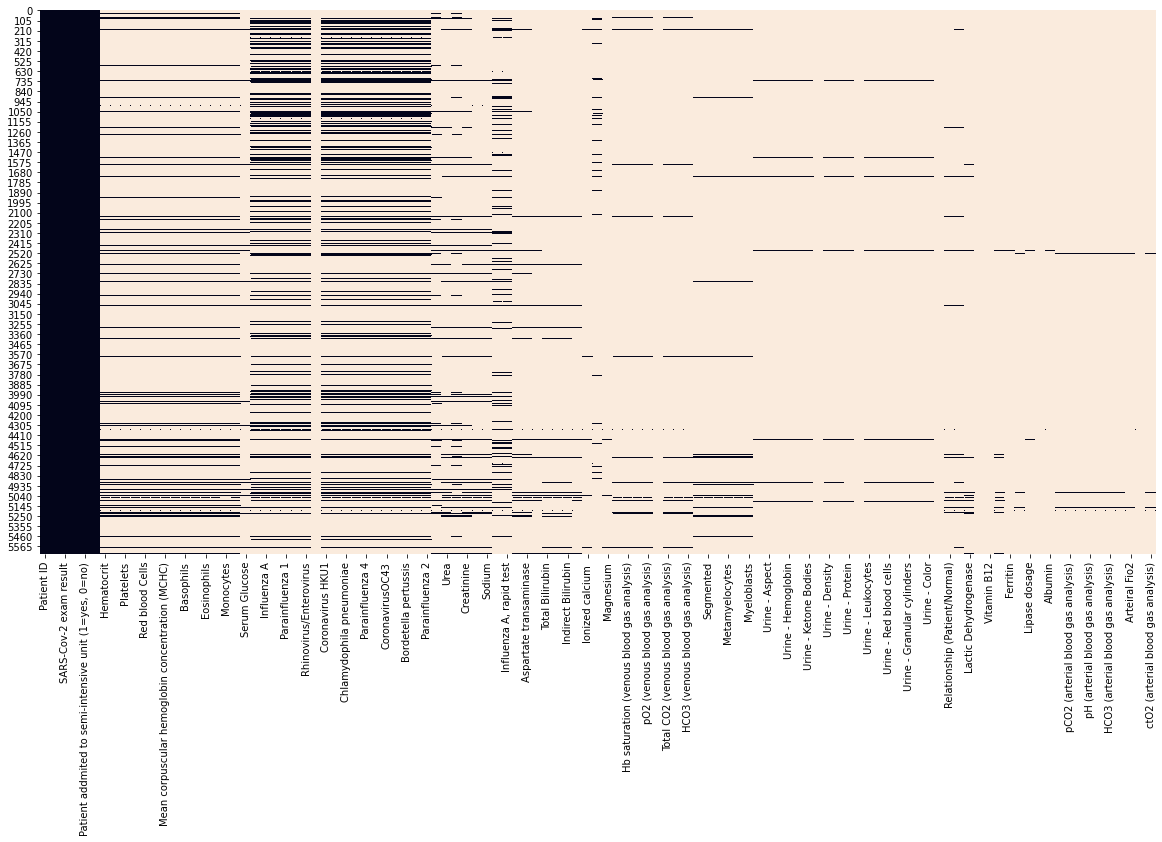

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

In [8]:
# Mesure du taux de valeurs manquantes
#Somme des valeurs manquantes dans toutes nos colonnes
#df.isna().sum()

#Pourcentage (division par le nombre de lignes) avec tri 
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## Analyse de fond

### 1. Visualisation initiale - Elimination des colonnes inutiles

In [9]:
pd.set_option('max_rows', 100)

#Pour cela, on fait du boolean indexing avec un masque 'colonnes' (ie df.columns avec un booléen sur les colonnes)
#(contrairement à df[mask] avec mask un masque sur les lignes
#pour identifier les colonnes où il y a moins de 90% de valeurs colonnes
#nb : isna().sum fait la somme des lignes pour chaque colonne. Le résultat du test < 0.9 porte sur chaque colonne.
maskcols=df.isna().sum()/df.shape[0] < 0.9
#liste des colonnes vérifiant la condition : 
#df.columns[maskcols]

#les 5644 lignes du df sur les colonnes vérifiant la condition :
df[ df.columns[maskcols ]]



,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# on récupère maintenant 39 colonnes. On définit notre dataframe avec ces colonnes uniquement.
df=df[ df.columns[maskcols ]]


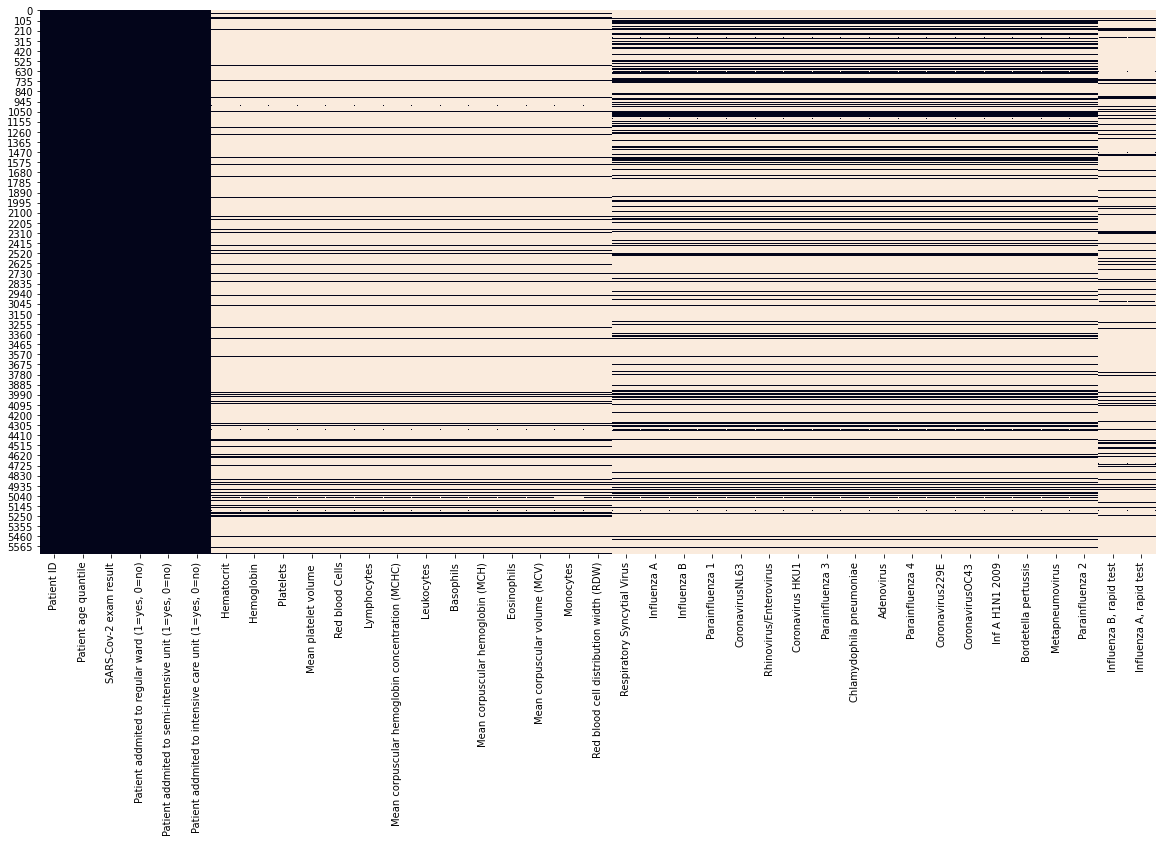

In [11]:
#Affichage des données manquantes sur ce nouveau df 'propre' sur lequel faire l'analyse: 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

In [12]:
#On élimine Patient Id qui ne nous sert pas :
df=df.drop('Patient ID', axis=1)

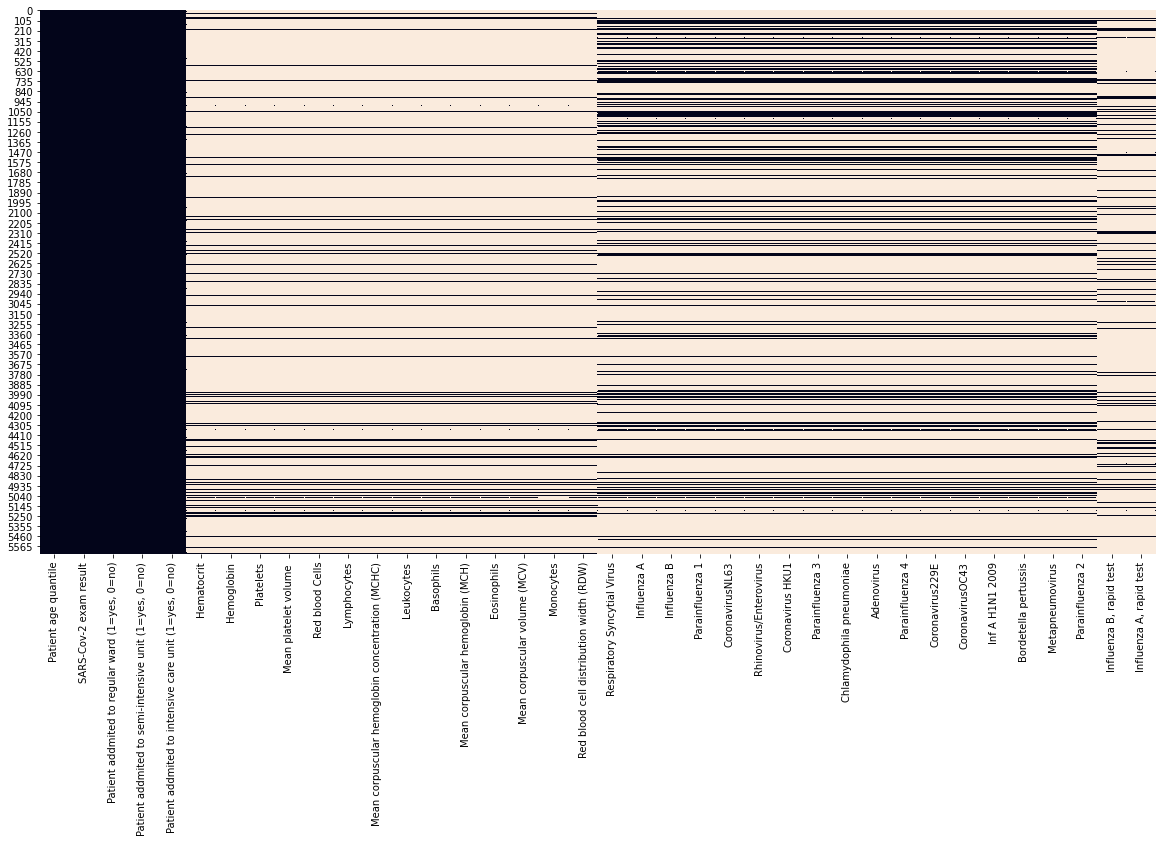

In [13]:
#Affichage des données manquantes sur ce nouveau df 'propre' sur lequel faire l'analyse: 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False);

## Examen de la colonne target

### Voyons la répartition des + et -

In [14]:
df['SARS-Cov-2 exam result'].value_counts(normalize=False)

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [15]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Signification des variables

On va tracer les graphes de la **distribution** des variables selon leur type. Pour cela, on regarde les types détectés précédemment.

#### Histogramme des variables continues de type float64

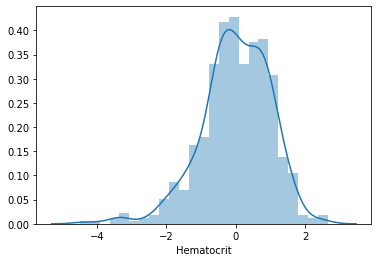

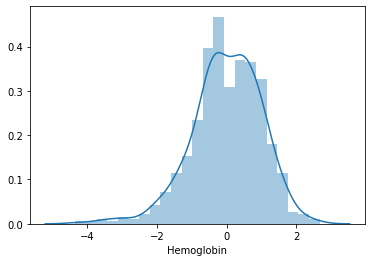

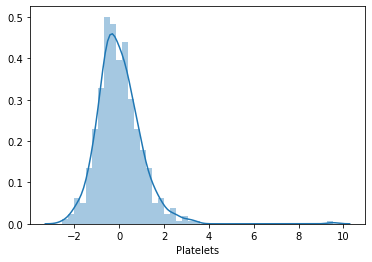

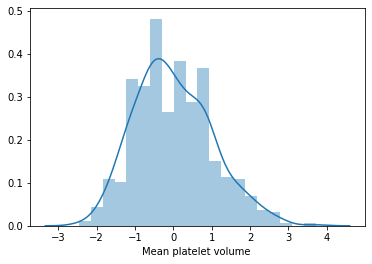

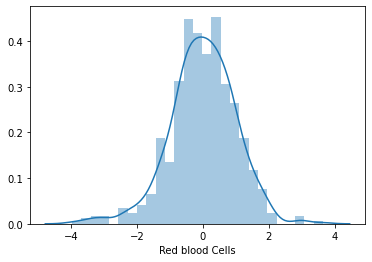

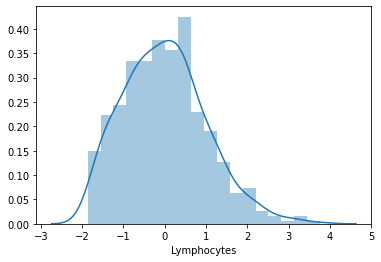

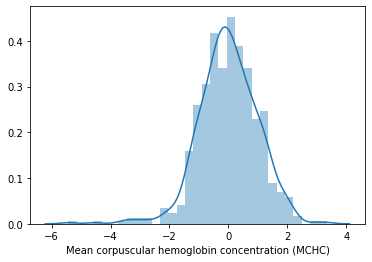

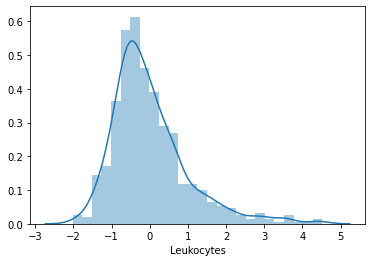

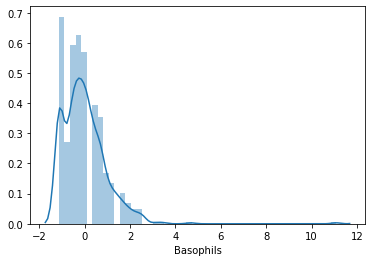

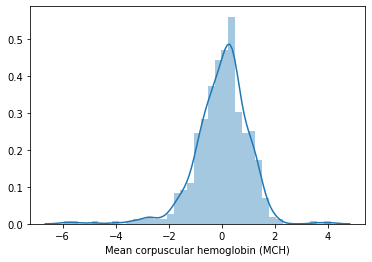

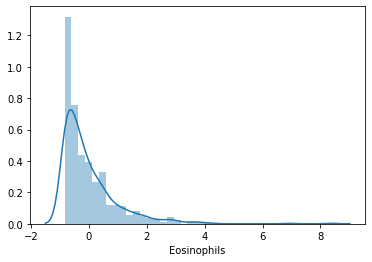

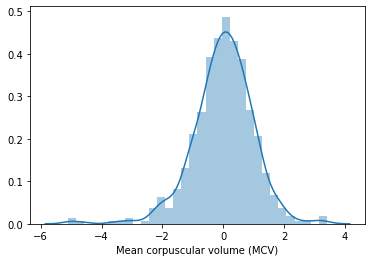

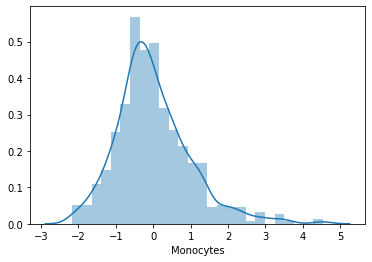

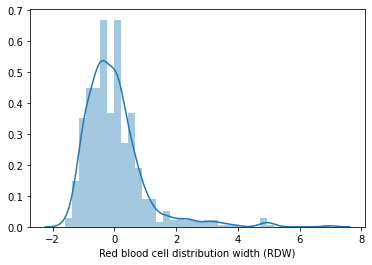

In [16]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### Histogramme des variables de type int64

### Les variables Qualitatives 

Recherche des catégories.

In [17]:
#Affichage des catégories : 
for col in df.select_dtypes('object'):
    print(f'{col :.<50} {df[col].unique()}')

SARS-Cov-2 exam result............................ ['negative' 'positive']
Respiratory Syncytial Virus....................... [nan 'not_detected' 'detected']
Influenza A....................................... [nan 'not_detected' 'detected']
Influenza B....................................... [nan 'not_detected' 'detected']
Parainfluenza 1................................... [nan 'not_detected' 'detected']
CoronavirusNL63................................... [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus............................ [nan 'detected' 'not_detected']
Coronavirus HKU1.................................. [nan 'not_detected' 'detected']
Parainfluenza 3................................... [nan 'not_detected' 'detected']
Chlamydophila pneumoniae.......................... [nan 'not_detected' 'detected']
Adenovirus........................................ [nan 'not_detected' 'detected']
Parainfluenza 4................................... [nan 'not_detected' 'detected']
Coronavirus2

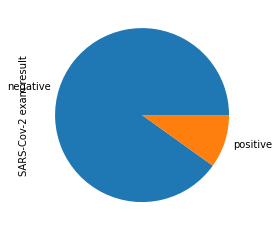

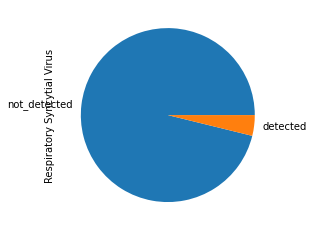

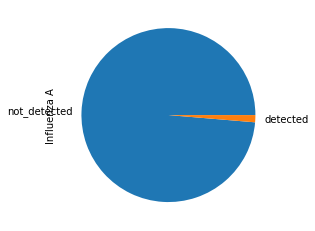

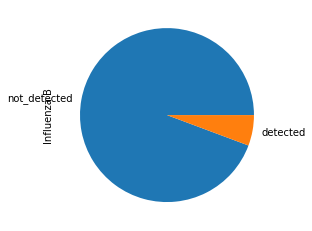

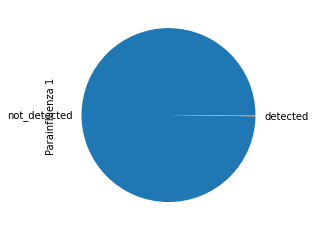

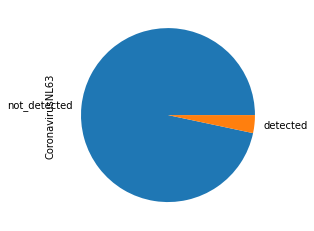

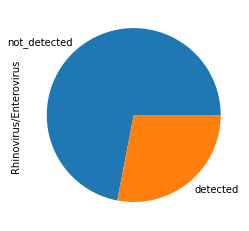

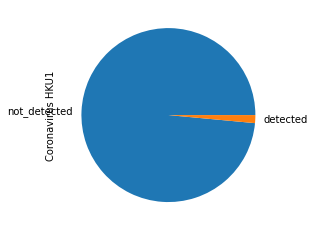

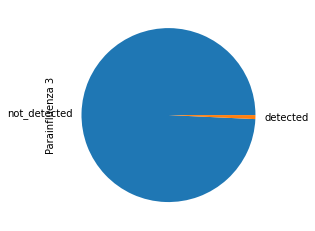

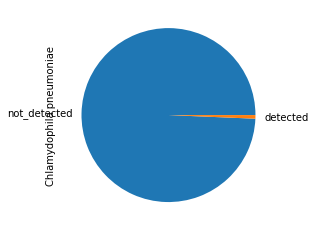

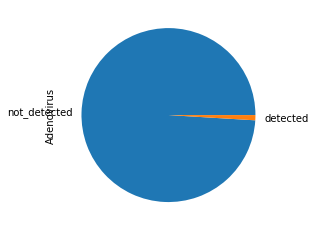

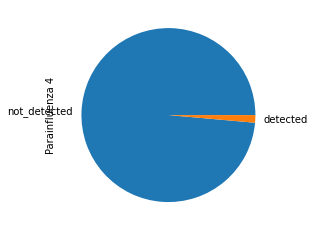

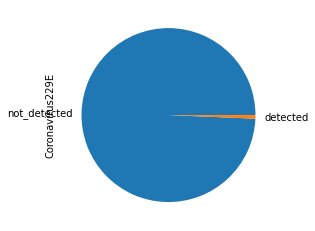

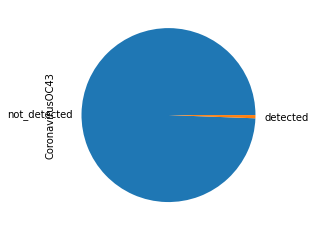

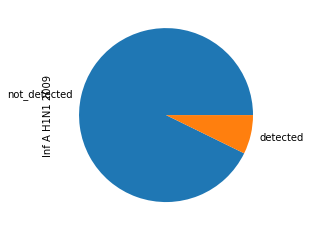

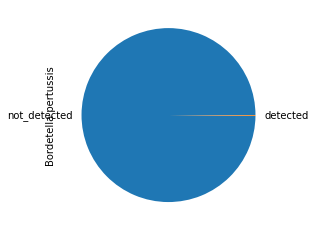

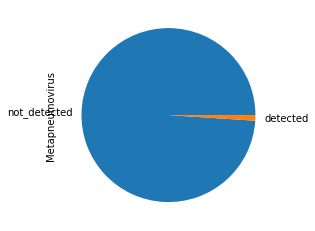

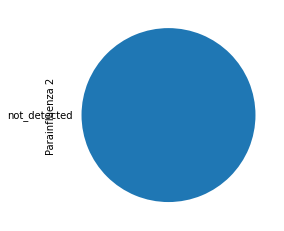

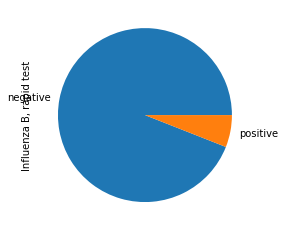

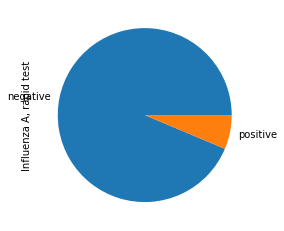

In [18]:
#Comptage des valeurs par catégories
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Relation Variables / Target

*comme on a des groupes positifs et négatifs. On va créer deux sous-ensembles data.*

*Ceci va permettre de vérifier si les relations des variables avec la target sont différentes selon la valeur de la target.*

In [19]:

positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']


In [20]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']


*Et dans la foulée, on va créer deux sous-ensembles viral et blood. Selon le taux de valeurs manquantes.*

In [21]:
#on crée une variable missing_rate donnant par colonne le taux de valeurs manquantes.
missing_rate = df.isna().sum()/df.shape[0]

In [22]:
#ce qui permet (par boolean indexing) de ne sélectionner que les colonnes pour lesquelles ce taux vérifie des conditions : 
#ainsi pour avoir les colonnes de type 'test sanguin'
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

#et de même pour avoir les colonnes de type 'test viral'
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]


*On va alors pouvoir analyser les relations target/variables de manière super efficace :*


### Target / Blood

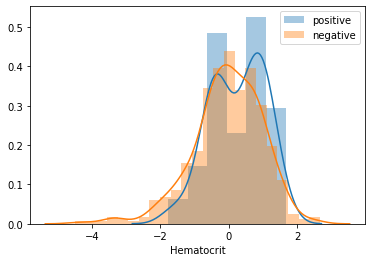

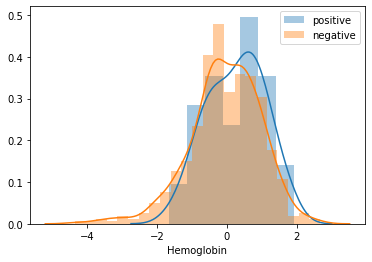

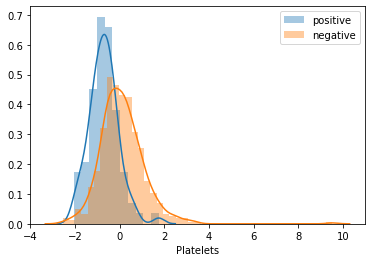

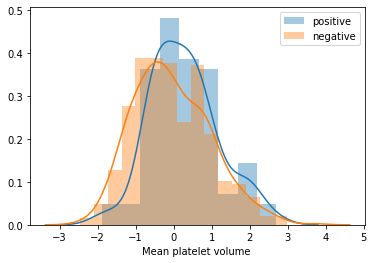

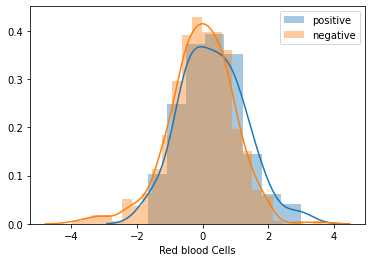

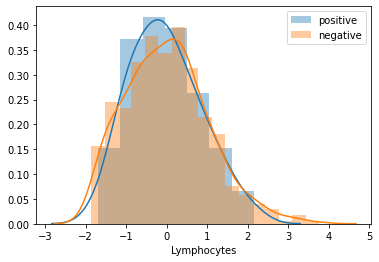

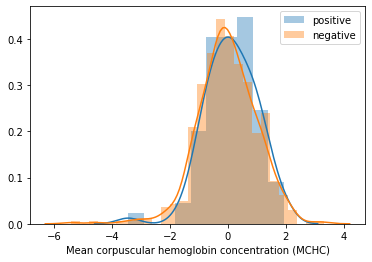

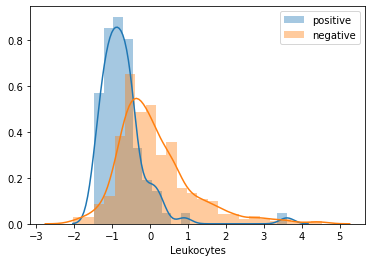

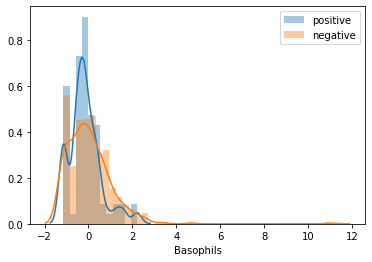

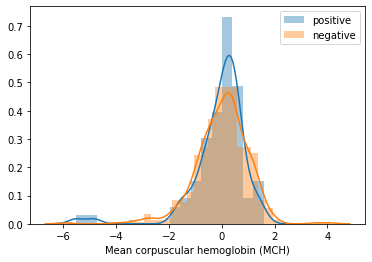

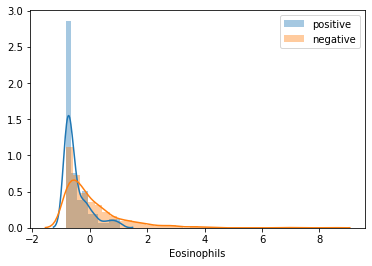

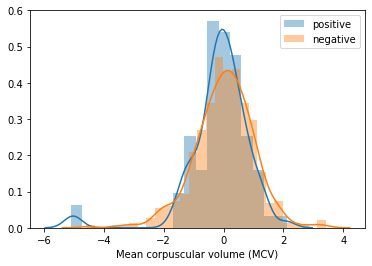

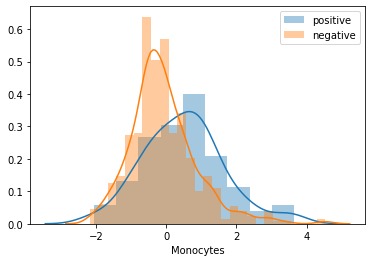

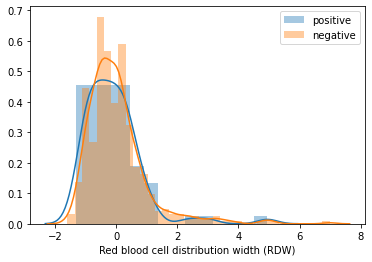

In [23]:

for col in blood_columns:
    #avec le diagramme de distribution en séparant les cas positifs des cas négatifs
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

### Target / age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

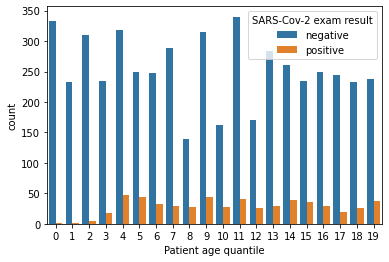

In [24]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

### Target / Viral

VQ -> Crosstab


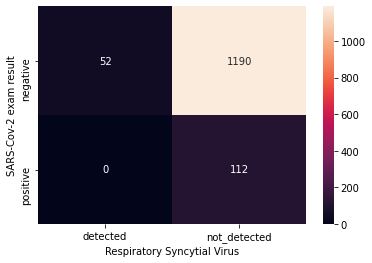

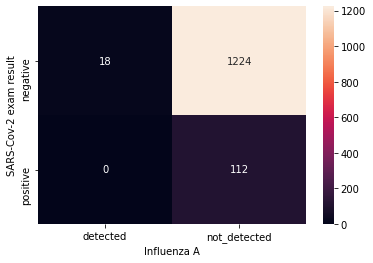

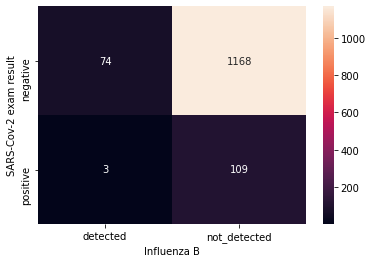

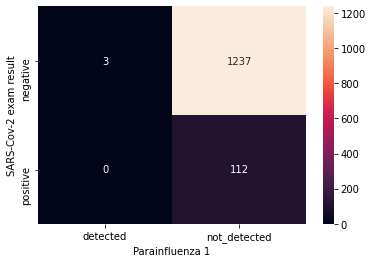

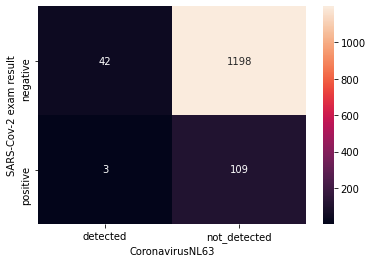

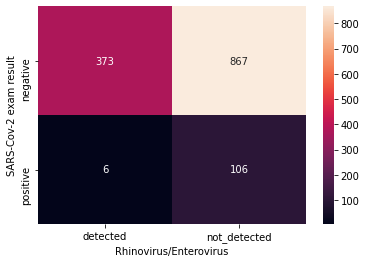

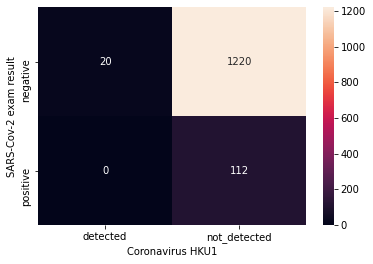

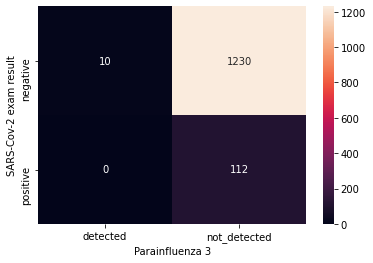

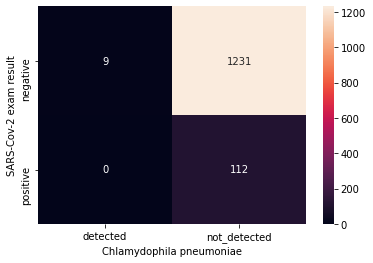

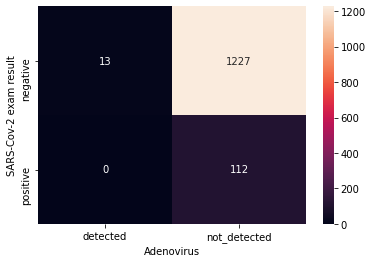

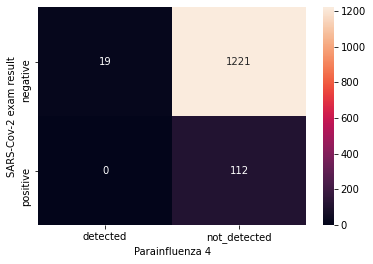

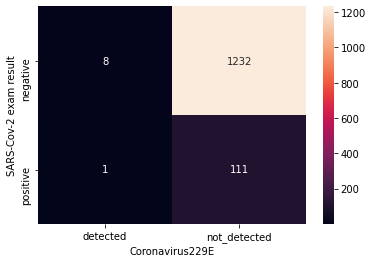

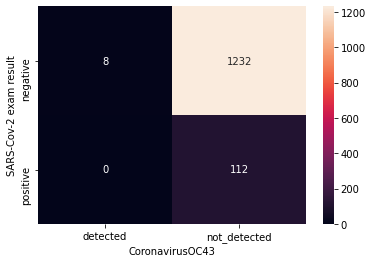

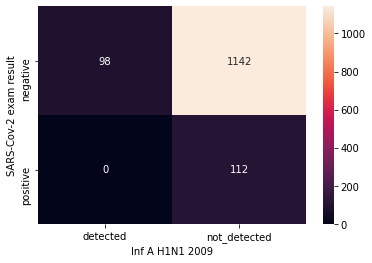

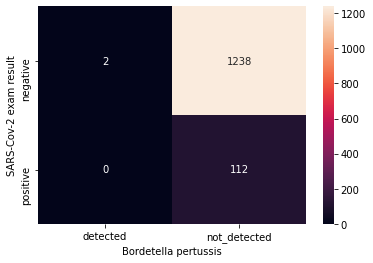

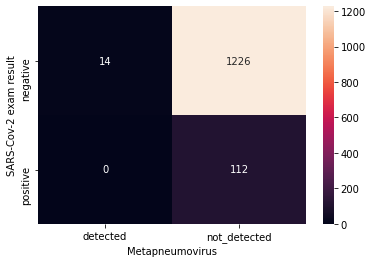

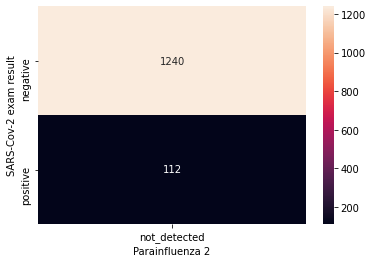

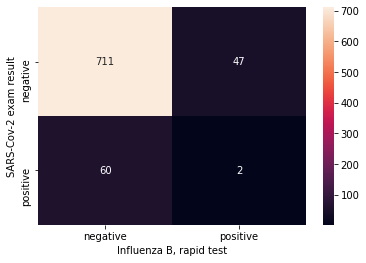

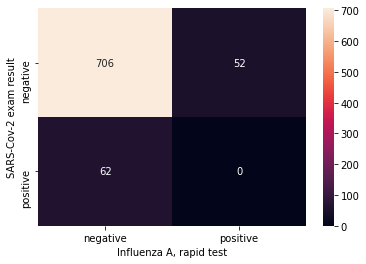

In [25]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

# Analyse plus détaillée : relations variables-variables

On s'intéresse ici aux relations entre variables


### blood_data / blood_data
    

<AxesSubplot:>

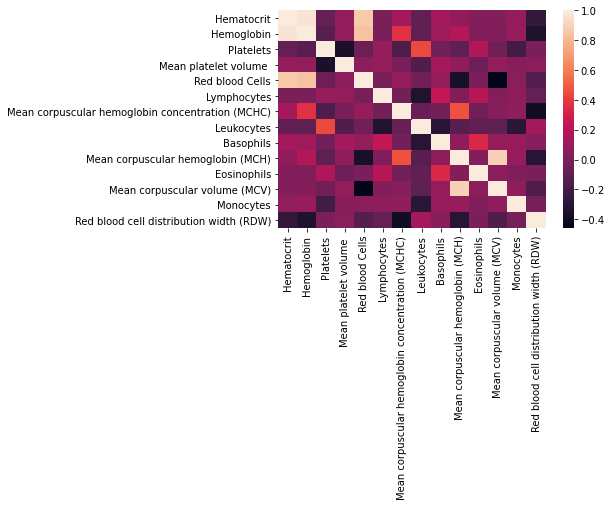

In [26]:
#mais une autre visualisation peut-être plus claire peut être obtenue avec un heatmap sur les corrélations :
sns.heatmap(df[blood_columns].corr())

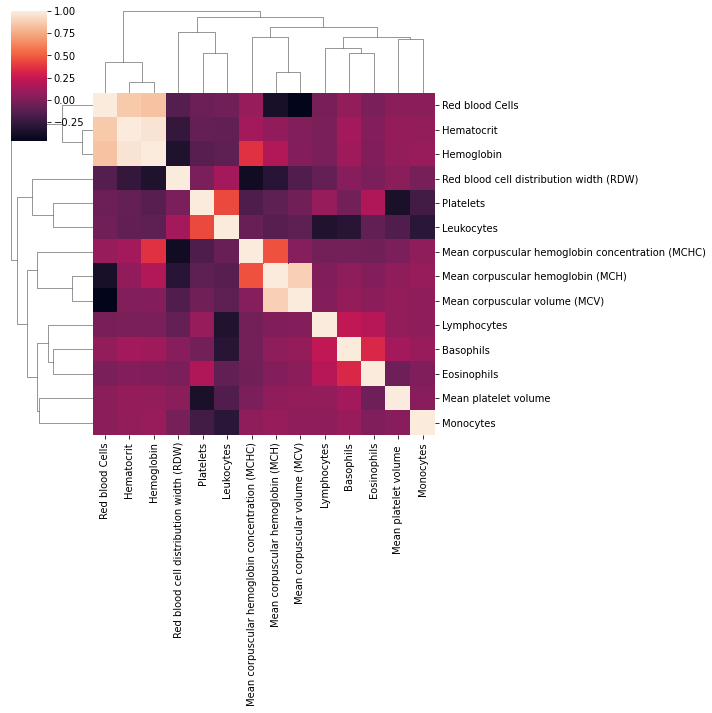

In [27]:
#il y a également clustermap qui ajout un regroupement :
sns.clustermap(df[blood_columns].corr())

    * blood_data / age
    
    * viral / viral
    
    * relation maladie / blood_data
    
    * relation hospitalisation / est malade
    
    * relation hospitalisation / blood

### Relation Age / variables blood

Question : y-a-il une relation linéaire distincte entre l'âge et les variables 'blood' selon la valeur de la target ?

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

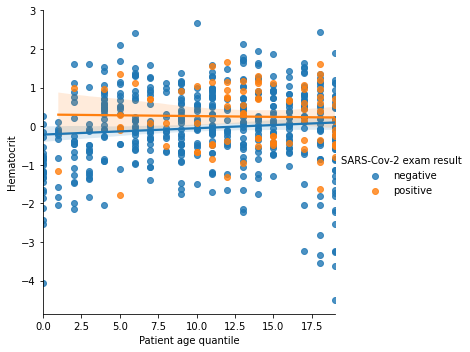

<Figure size 432x288 with 0 Axes>

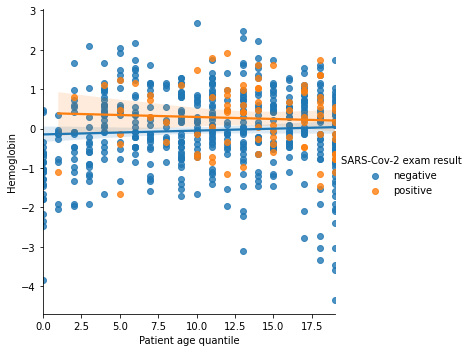

<Figure size 432x288 with 0 Axes>

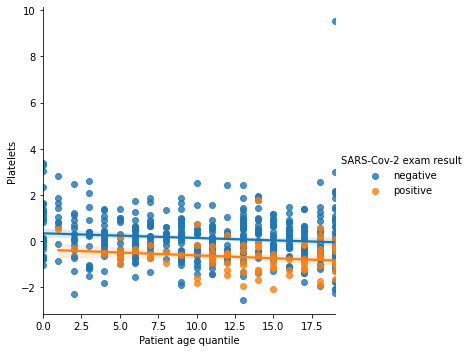

<Figure size 432x288 with 0 Axes>

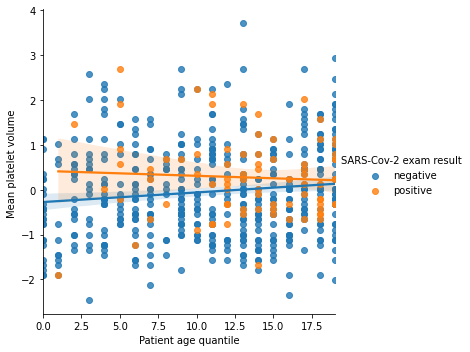

<Figure size 432x288 with 0 Axes>

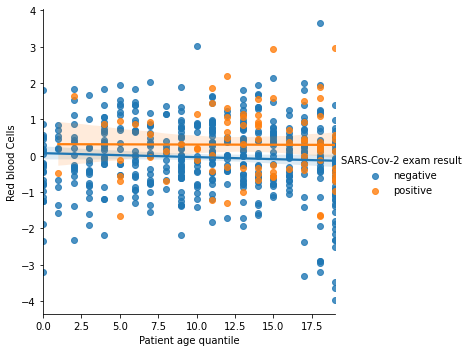

<Figure size 432x288 with 0 Axes>

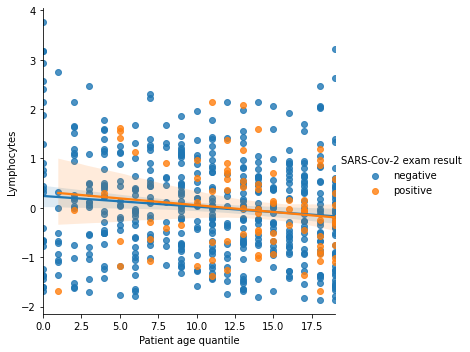

<Figure size 432x288 with 0 Axes>

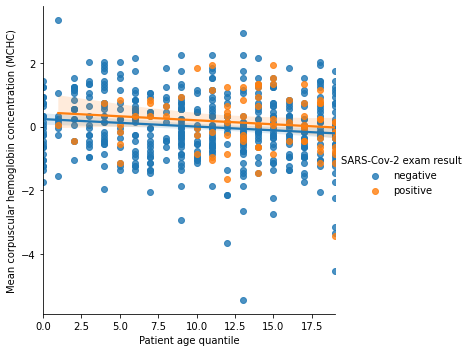

<Figure size 432x288 with 0 Axes>

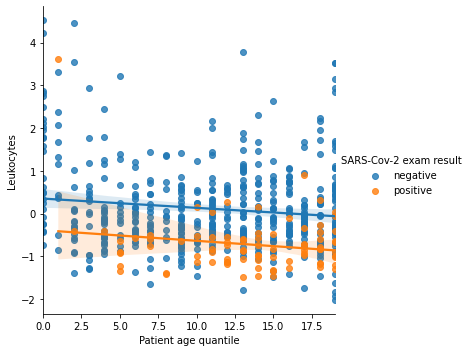

<Figure size 432x288 with 0 Axes>

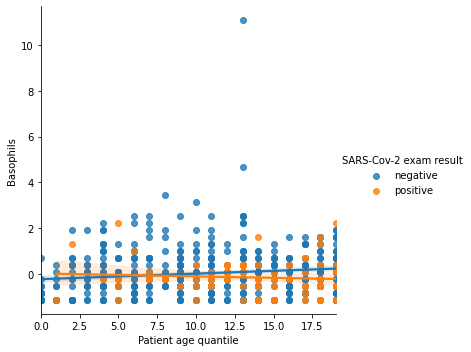

<Figure size 432x288 with 0 Axes>

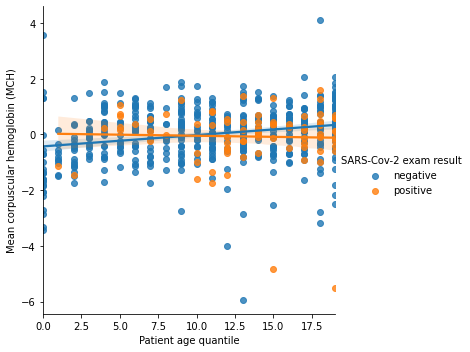

<Figure size 432x288 with 0 Axes>

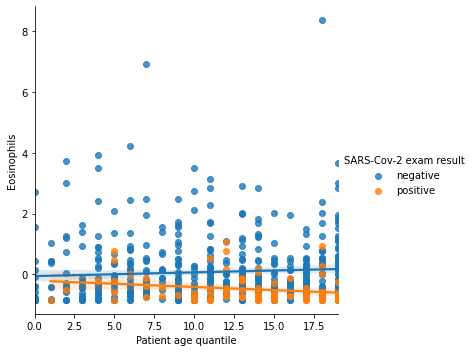

<Figure size 432x288 with 0 Axes>

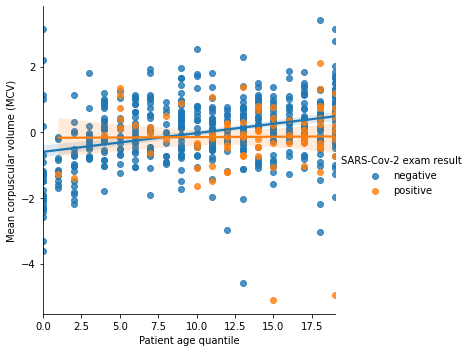

<Figure size 432x288 with 0 Axes>

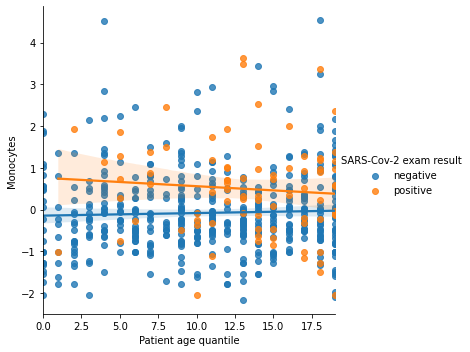

<Figure size 432x288 with 0 Axes>

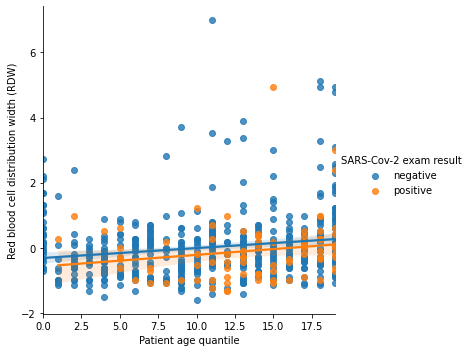

In [28]:
#on utilise la fonction lmplot qui permet de visualiser des courbes de régression dans le nuage de points

for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

Les relations linéaires semblent très faible. On va regarder la valeur des corrélations 
en ne regardant que la variable âge seulement (sélection de la colonne 'age' dans le df résultat): 

In [29]:
#La fonction corr fonctionne sur toutes les variables int et float.
#On les prend toutes car blood est float alors que age est int  

(df.corr()['Patient age quantile']).sort_values(ascending=False)


Patient age quantile                                     1.000000
Mean corpuscular volume (MCV)                            0.281655
Mean corpuscular hemoglobin (MCH)                        0.197394
Red blood cell distribution width (RDW)                  0.166429
Mean platelet volume                                     0.119449
Basophils                                                0.107525
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Monocytes                                                0.050962
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Eosinophils                                              0.022085
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Red blood Cells                                         -0.037510
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Lymphocyte

Et en effet, il n'y a pas de forte relation entre l'âge et les autres variables. Le coef le plus fort est 0.28 en positif
et -0.16 en négatif. Ce qui reste très faible.
On gare cependant ces résultats pour plus tard, pour avoir une idée des forces, des relations qu'il y a entre les variables.

### Relations Viral / Viral

Ici on pourrait utiliser un 'graphique mosaïque' (cf le package statmodels), 
mais dans ce cas, on va simplement s'intéresser aux variables 'Influenza A/B, rapid test' pour répondre à la question,
Pourquoi a-t-on ces variables en plus des variables influenza A/B ?

Ceci en regardant les crosstab :




In [30]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

"Influenza A, rapid test",negative,positive
Influenza A,,
detected,2,4
not_detected,245,15


In [31]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

"Influenza B, rapid test",negative,positive
Influenza B,,
detected,18,11
not_detected,233,4


On remarque que 15 cas ont été testés positifs en rapid test alors que 260 étaient testés positifs sur influenza A
de même, 4 négatifs sur les 237 positifs en influenza B. Ceci corrobore le manque reconnu de fiabilité des rapid tests.


### Relation Viral / blood_data
on utilise pour cela un résumé des variables Viral (la nouvelle variable 'est malade')

Et on va essayer de répondre à la question : 'est-ce que la relation des variables blood par rapport aux maladies autres
que covid est la même qu'avec le covid ? Notamment en ce qui concerne les leucocyte, placetes et hematocrit'.

#### Création d'une nouvelle variable 'est malade'

On créée le booléen true pour les lignes avec au moins un viral (sauf rapid test) détecté :

In [32]:
df[viral_columns[:-2]]=='detected' #remarque : covid n'est pas pris en compte, ce qui nous arrange

,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


On prend la somme par ligne (ie pour chaque individu, on a le nombre de tests viraux positifs): 

In [33]:
np.sum(df[viral_columns[:-2]]=='detected', axis=1)

0       0
1       1
2       0
3       0
4       1
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Length: 5644, dtype: int64

Un plot nous donne une idée de la répartition : 

<AxesSubplot:>

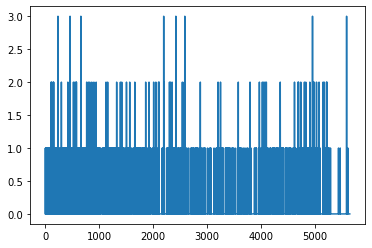

In [34]:
np.sum(df[viral_columns[:-2]]=='detected', axis=1).plot()

Mais on va s'intéresser aux cas où il y a au moins un test positif pour avoir une nouvelle variable 'est malade' :

In [35]:
df['est malade'] = np.sum(df[viral_columns[:-2]]=='detected', axis=1) >= 1

In [36]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",est malade
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True


On peut alors analyser la relation entre cette variable (qui résume le var viral) et les variables blood: 

Pour cela on va visualiser la distribution des variables blood selon la valeur de est malade (comme avec target)

In [37]:
#Création de l'échantillon df des individus topés positifs sur les tests viraux
malade_df = df[df['est malade']==True]
#Création de l'échantillon df des individus topés négatifs
non_malade_df = df[df['est malade']==False]

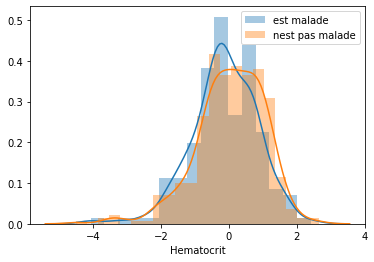

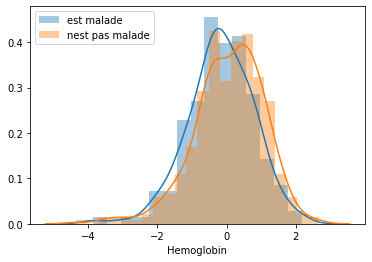

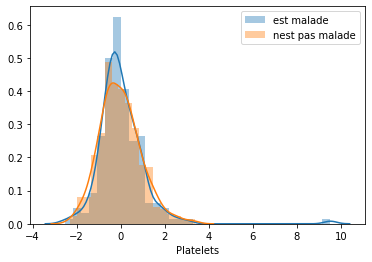

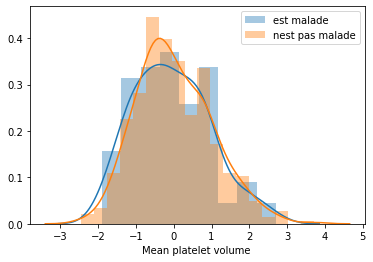

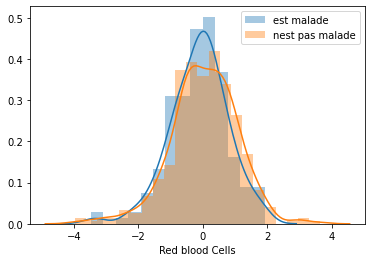

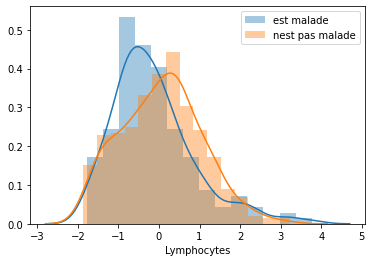

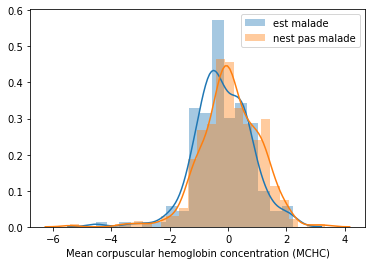

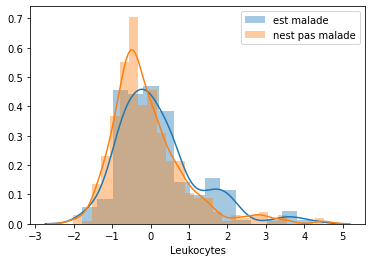

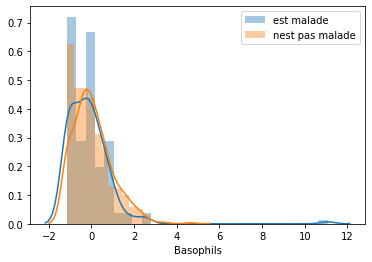

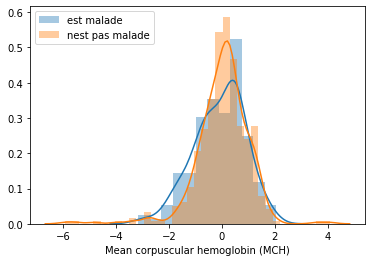

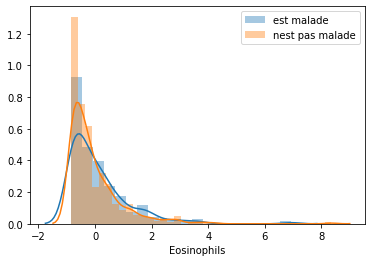

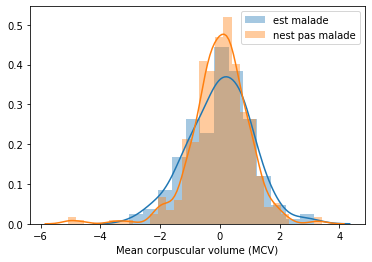

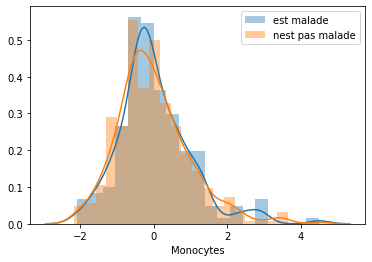

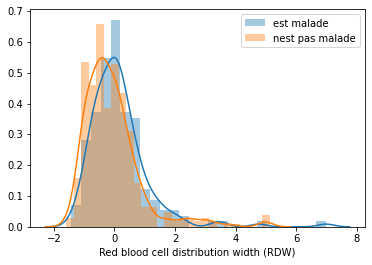

In [38]:
#
for col in blood_columns:
    #avec le diagramme de distribution en séparant les cas positifs des cas négatifs
    plt.figure()
    sns.distplot(malade_df[col], label='est malade')
    sns.distplot(non_malade_df[col], label='n''est pas malade')
    plt.legend()

remarque : 
    pas de décallage pour platelets
    lymphocytes différents (pas de différence avec covid)

### Relation hospitalisation / est malade


In [39]:
#Création de cette fonction pour créer la nouvelle variable
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return('surveillance')
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return('soins semi-intensifs')
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return('soins intensifs')
    else:
        return('inconnu')
    

In [40]:
#création de la nouvelle variable 'statut'
df['statut'] = df.apply(hospitalisation, axis=1)  #remarque : axis=1 pour indiquer d'appliquer sur l'axe des colonnes

<AxesSubplot:ylabel='statut'>

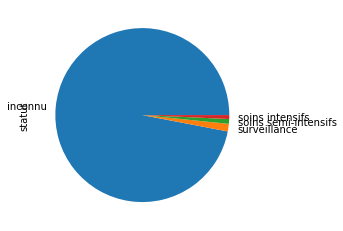

In [41]:
df['statut'].value_counts().plot.pie()

...On remarque que bcp sont inconnus...

In [42]:
#j'essaie un crosstab :
pd.crosstab(df['est malade'],df['statut'])

statut,inconnu,soins intensifs,soins semi-intensifs,surveillance
est malade,,,,
False,4844,19,27,62
True,630,22,23,17


<AxesSubplot:xlabel='statut', ylabel='est malade'>

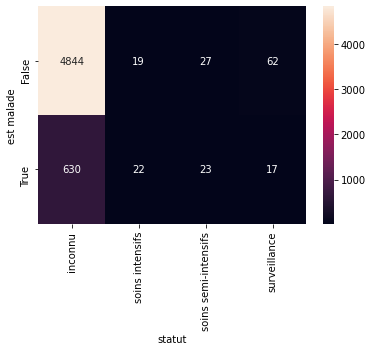

In [43]:
#et avec sns
sns.heatmap(pd.crosstab(df['est malade'],df['statut']), annot=True, fmt='d')


On note une proportion décroissante de 'malades' selon le parcours intensif, semi-intensif, surveillance.

### Relation hospitalisation / blood

On va maintenant regarder la relation entre les blood et le parcours :
pour cela, on va tracer la distribution de chaque variable col de blood_columns dans chaque échantillon décrit par 'statut'

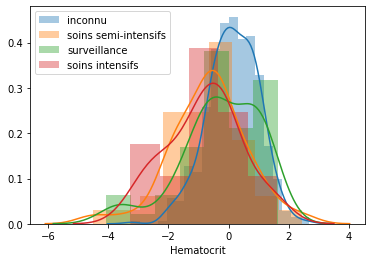

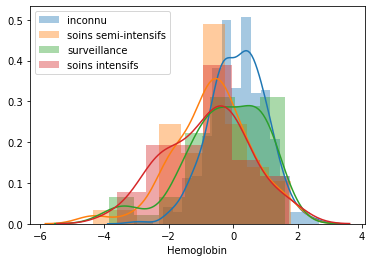

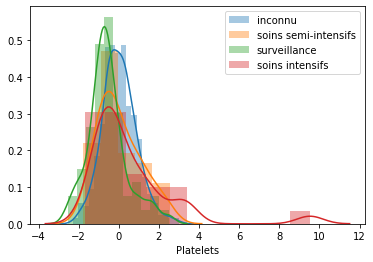

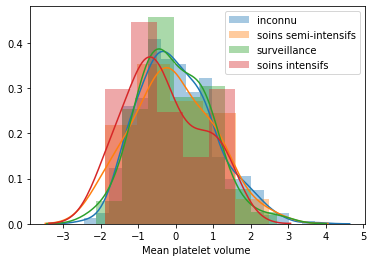

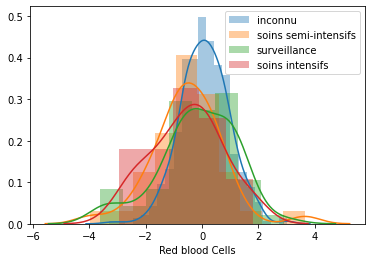

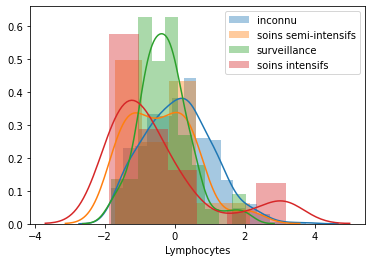

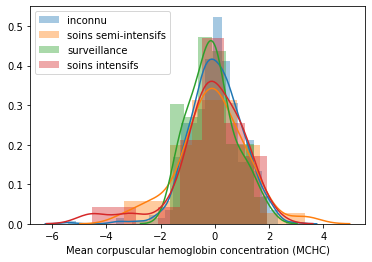

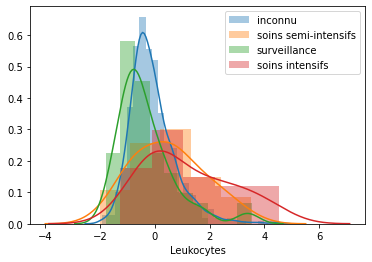

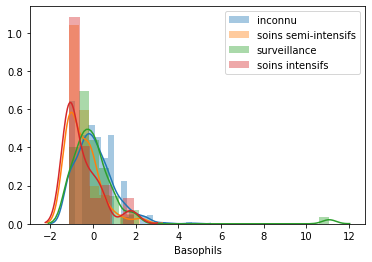

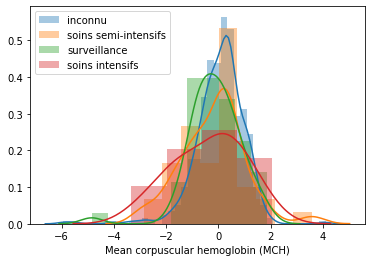

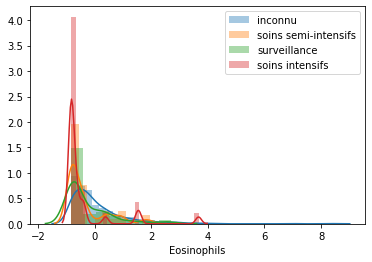

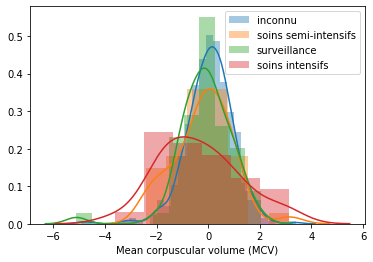

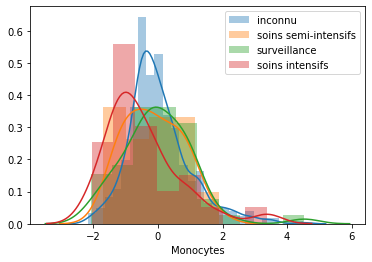

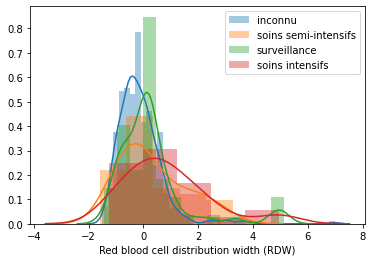

In [44]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique(): #ok là, on distingue les valeurs de statut à l'aide de unique
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

### NaN plus détaillées

Question : ce qui se passerait si on éliminait les individus avec des nan ?

In [45]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

**On voit qu'il nous reste très peu d'individus avec toutes les données renseignées.
Il va donc falloir remplir les données manquantes, ou du moins certaines. Question : lesquelles ?**

décompte des échantillons restreint aux différents groupes de variables : 

In [46]:
df[blood_columns].count() #nb: on a moins que le total puisque on perd les individus qui ont des valeurs que 'viral'
                          #et les valeurs varient pour chaque variable car count ne compte pas les nan

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [47]:
df[viral_columns].count() #idem inversement avec blood

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

On va plutôt garder les viral et comme les blood sont importante, on va compléter les blood.

**Il faut aussi savoir l'état de la target si on élimine les na des variables (pour chaque groupe) :**

In [48]:
#Cas des viral

#on crée un df contenant tous les individus mais avec seulement les colonnes 'viral' sauf les rapid test
df1=df[viral_columns[:-2]].copy()

#on ajoute la colonne 'covid' en récupérant la target
df1['covid']=df['SARS-Cov-2 exam result']

#puis on élimine les lignes contenant des na et on regarde la répartition de la target
(df1.dropna())['covid'].value_counts(normalize=True)

negative    0.91716
positive    0.08284
Name: covid, dtype: float64

**Il nous reste à peu près les même proportions que sur l'échantillon global. ok.**

In [49]:
#Cas des blood.

#on crée un df contenant tous les individus mais avec seulement les colonnes 'blood'
df2=df[blood_columns].copy()

#on ajoute la colonne 'covid' en récupérant la target
df2['covid']=df['SARS-Cov-2 exam result']

#puis on élimine les lignes contenant des na et on regarde la répartition de la target
(df2.dropna())['covid'].value_counts(normalize=True)

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

# PRE-PROCESSING

In [50]:
#Récupération du df d'origine (il est bien de choisir un nouveau nom, différent de l'étape d'EDA, mais ici c'est ok)
df = data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [51]:
#On ne va retenir que les colonnes réellement utiles, détectées dans l'étape précédente
missing_rate = df.isna().sum() / df.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [52]:
#on récupère de la même façon que lors de l'EDA avec les deux groupes de colonnes, cette fois en constituant une liste
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)])


In [53]:
#et on crée des listes de colonnes importantes : 
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [54]:
#et on restreint notre data set aux 33 colonnes importantes : 
df = df[key_columns + blood_columns + viral_columns]
df.head()


,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


## Train test - Encodage - Nettoyage (imputation) -> Preprocessing

In [55]:
from sklearn.model_selection import train_test_split

Voilà, création des train set et test set terminé.

### Encodage

In [56]:
# Permet Créer des variables factices 
# pour effectuer facilement et précisément une analyse en composantes principales avec toutes les variables associées
df = pd.get_dummies(df)
df.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),SARS-Cov-2 exam result_negative,SARS-Cov-2 exam result_positive,Respiratory Syncytial Virus_detected,Respiratory Syncytial Virus_not_detected,Influenza A_detected,Influenza A_not_detected,Influenza B_detected,Influenza B_not_detected,Parainfluenza 1_detected,Parainfluenza 1_not_detected,CoronavirusNL63_detected,CoronavirusNL63_not_detected,Rhinovirus/Enterovirus_detected,Rhinovirus/Enterovirus_not_detected,Coronavirus HKU1_detected,Coronavirus HKU1_not_detected,Parainfluenza 3_detected,Parainfluenza 3_not_detected,Chlamydophila pneumoniae_detected,Chlamydophila pneumoniae_not_detected,Adenovirus_detected,Adenovirus_not_detected,Parainfluenza 4_detected,Parainfluenza 4_not_detected,Coronavirus229E_detected,Coronavirus229E_not_detected,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Bordetella pertussis_detected,Bordetella pertussis_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,Parainfluenza 2_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive"
0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0


In [57]:
def imputation(df):
    return df.dropna(axis=0) #on enlève les individus qui ont des valeurs Nan


In [58]:
    df = imputation(df)
    X = df.drop(['SARS-Cov-2 exam result_negative', 'SARS-Cov-2 exam result_positive'], axis=1)
    y = df[['SARS-Cov-2 exam result_negative', 'SARS-Cov-2 exam result_positive']]
    
    #on écrit un rapport des valeurs positives négatives
    print('Répartition des valeurs positive(1)/negative(0) de la target y :')
    print(y.value_counts())

Répartition des valeurs positive(1)/negative(0) de la target y :
SARS-Cov-2 exam result_negative  SARS-Cov-2 exam result_positive
1                                0                                  517
0                                1                                   81
dtype: int64


In [59]:
# standardiser the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(X)

In [60]:
df

array([[ 1.03013921,  0.23307003, -0.02796373, ..., -0.1490712 ,
         1.47106124, -0.10883167],
       [-1.78355532, -1.57225669, -0.77952203, ..., -0.1490712 ,
        -0.67978135, -0.10883167],
       [-0.37670806, -0.74957581, -0.59163225, ..., -0.1490712 ,
        -0.67978135,  9.18850213],
       ...,
       [ 0.67842739,  0.71296655,  1.09937396, ..., -0.1490712 ,
        -0.67978135, -0.10883167],
       [ 1.03013921, -3.24046957, -2.78367763, ..., -0.1490712 ,
        -0.67978135, -0.10883167],
       [ 1.38185102,  0.69011465,  0.5357054 , ..., -0.1490712 ,
        -0.67978135, -0.10883167]])

Voilà, encodage terminé.

### Imputation

Création d'une fonction

C'est basique mais c'est tout.

### -> Preprocessing

Là aussi une fonction qui sera utilisée soit sur le train set soit sur le test set

Fonction de preprocessing complétée. 
On va pouvoir faire passer à présent notre train set et notre test set dans cette fonction.

Voilà, on a fait la version basique, la plus simple possible de notre pre-processing.

Il est prêt pour fournir un dataset propre à un modèle.

On peut donc maintenant créer, entrainer et diagnostiquer un modèle en passant à l'étape de Modélisation.

(remarque : elle ne tient pas compte des résultats du EDA - sauf les colonnes utiles - notamment sur les na puisque
ici on supprime toutes les lignes avec des na, ce qui restreint le dataset à 99 individus, on avait vu qu'il fallait garder les données blood et compléter les viral, ce qu'on pourra faire plus tard).

## Modélisation

On va choisir un modèle basique, facile à diagnostiquer : decision tree classifier.

### Procédure d'évaluation du modèle

On va utiliser la métrique F1, très bonne pour avoir une bonne évaluation du rapport de la précision et la sensibilité - recall-  (qui mesurent les proportions de FP et de FN, erreur de type 1 et 2).

On va donc importer le score F1

et également les matrices de confusion pour avoir ces rapports de FN et FP

et un rapport de classification, super outil pour avoir un bilan du recall, précision, score F1, accuracy (exactitude)

et depuis model selection la **learning curve** pour savoir si le modèle est en over ou under fitting. Très utile pour décider si l'on va avoir besoin de sélectionner des variables, de créer des polynômes...



Le score est de 100% sur les train set mais le modèle n'arrive pas à estimer correctement sur de nouvelles données. A
A partir de là, on peut essayer de modifier le dataset pour corriger l'overfitting. 
Notamment en augmentant les données (ce qui fonctionne bien sur l'of).
On va modifier par exemple le dropna.

In [61]:
#Importation des différentes librairies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report  

In [ ]:
model = XGBClassifier()

In [68]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [69]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

AttributeError: 'list' object has no attribute 'fit'

In [64]:
print(X_train.shape)
print(X_test.shape)

(418, 52)
(180, 52)


In [65]:
X

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus_detected,Respiratory Syncytial Virus_not_detected,Influenza A_detected,Influenza A_not_detected,Influenza B_detected,Influenza B_not_detected,Parainfluenza 1_detected,Parainfluenza 1_not_detected,CoronavirusNL63_detected,CoronavirusNL63_not_detected,Rhinovirus/Enterovirus_detected,Rhinovirus/Enterovirus_not_detected,Coronavirus HKU1_detected,Coronavirus HKU1_not_detected,Parainfluenza 3_detected,Parainfluenza 3_not_detected,Chlamydophila pneumoniae_detected,Chlamydophila pneumoniae_not_detected,Adenovirus_detected,Adenovirus_not_detected,Parainfluenza 4_detected,Parainfluenza 4_not_detected,Coronavirus229E_detected,Coronavirus229E_not_detected,CoronavirusOC43_detected,CoronavirusOC43_not_detected,Inf A H1N1 2009_detected,Inf A H1N1 2009_not_detected,Bordetella pertussis_detected,Bordetella pertussis_not_detected,Metapneumovirus_detected,Metapneumovirus_not_detected,Parainfluenza 2_not_detected,"Influenza B, rapid test_negative","Influenza B, rapid test_positive","Influenza A, rapid test_negative","Influenza A, rapid test_positive"
1,17,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0
8,1,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
15,9,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,1
18,11,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
22,9,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,19,0.190738,0.165628,-0.102873,0.908221,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
5614,19,-0.289922,-0.523588,0.663397,-0.774677,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
5615,15,0.717175,1.105468,-0.492289,-0.213711,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0
5618,17,-3.242548,-2.779203,-1.773594,-0.550290,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0


In [72]:
def data_target(dataframe, dict_result, models):
    
    counter = 0

    for i in models:

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

        i.fit(X_train, y_train)
        y_pred = i.predict(X_test)

        y[y == 1] = "positif"
        y[y == 0] = "négatif"
        
        print ("\n\n", '≡'*18, "Etude Covid-19 avec model : ",i, '≡'*18, "\n")
        report = classification_report(y_test, y_pred)
        print(report)

        dict_result.update({counter : report})
        
        
#        if (counter == 0):
#            plt.figure(figsize=(30,20))
#            tree.plot_tree(i, filled=True, rounded = True,proportion=True,feature_names= X.columns,class_names=y.values)
#            plt.show()
        
    
        feature_imp = pd.Series(i.feature_importances_,index=X.columns).sort_values(ascending=False)
        print(feature_imp)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
              
        plot_confusion_matrix(i, X_test, y_test)
        plt.show()



 ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ Etude Covid-19 avec model :  DecisionTreeClassifier(max_depth=2, random_state=0) ≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡≡ 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       158
           1       0.55      0.27      0.36        22

   micro avg       0.88      0.88      0.88       180
   macro avg       0.73      0.62      0.65       180
weighted avg       0.86      0.88      0.87       180
 samples avg       0.88      0.88      0.88       180

Leukocytes                                          0.591349
Platelets                                           0.222768
Red blood Cells                                     0.185883
Influenza A, rapid test_positive                    0.000000
Red blood cell distribution width (RDW)             0.000000
CoronavirusNL63_detected                            0.000000
Parainfluenza 1_not_detected                        0.000000
Parainfluenza 1_detected                            0.000000
Influen

No handles with labels found to put in legend.


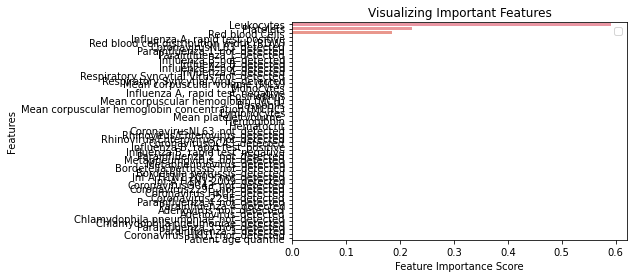

ValueError: multilabel-indicator is not supported

In [73]:
models = { RandomForestClassifier(), DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=2), XGBClassifier()}
dic_resultats = {}
data_target(df, dic_resultats, models)

## Analyse en composantes principales
Cette phase de l'analyse permet de mieux comprendre la structure de corrélation des variables afin de d'appréhender ce que seront les grandes classes de comportement des clients.

In [ ]:
model_selection